# Linear regression

The equation of the linear regression model is as follows:

$\hat{y} = \theta_{0} + \theta_{1} * x_{1} + \theta_{2} * x_{2} + ... + \theta_{n} * x_{n}$

* Where $\hat{y}$ is the predicted value.
* $n$ is the number of features.
* $x_{i}$ is the $i^{th}$ feature value.
* $\theta_{j}$ is the $j^{th}$ model parameter (including the bias term $\theta_{0}$).

This whole equation can be written in a concise form as follows:

$\hat{y} = h_{\theta}(x) = \theta . x$

Where $\theta$ is the model's parameters, and x is the inputs.

We need to calculate a performance measure that will be used to train the model. This performance measure will be RMSE (Root Mean Square Error). However, we will use the MSE (Mean Square Error) during training because it is easier to compute and it will still minimize the RMSE since RMSE is the square root of MSE.

$MSE(X, h_{\theta}) = \frac{1}{m} * \sum_{i = 1}^{m}(\theta^{T} * x^{(i)} - y^{(i)})^2$

There is an equation that finds the value $\theta$ that minimizes the cost function directly. This equation is called the _Normal Equation_, and it is:

$\hat{\theta} = (X^T * X)^{-1} * X^T * y$

Where:
* $\hat{\theta}$ is the value of $\theta$ that minimizes the cost function.
* y is the vector of target values.

The following code generates a random linear dataset:

In [2]:
import numpy as np
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

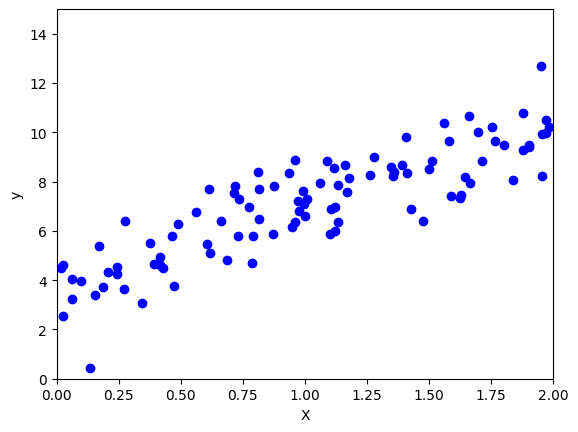

In [3]:
from matplotlib import pyplot as plt
plt.plot(X, y, 'bo')
plt.xlim((0, 2))
plt.ylim((0, 15))
plt.xlabel('X')
plt.ylabel('y')
plt.show()

Let us now compute the ideal parameters using the normal equation discussed earlier:

In [4]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance so that there is something to be multiplied by the bias term
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [5]:
theta_best

array([[3.7488134 ],
       [3.26900646]])

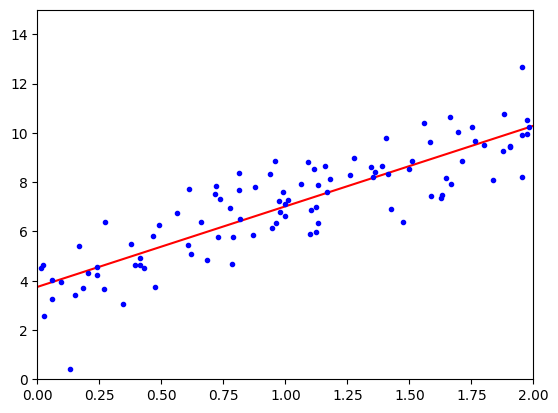

In [6]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1
y_predict = X_new_b.dot(theta_best)
plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.show()



Now let us see the performance of the sklearn model

In [7]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_ # intercept = bias, coef = other parameters

(array([3.7488134]), array([[3.26900646]]))

In [8]:
y_scikit_learn = lin_reg.predict(X_new)

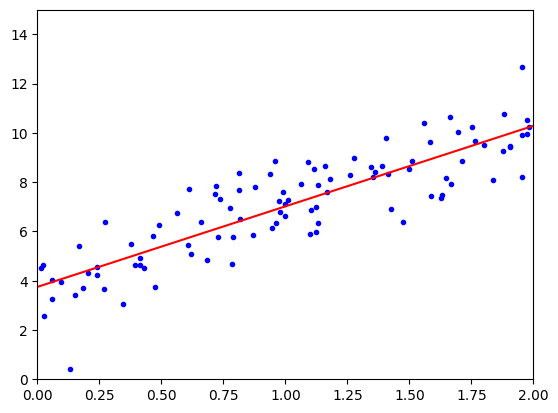

In [9]:
plt.plot(X, y, 'b.')
plt.plot(X_new, y_scikit_learn, 'r-')
plt.axis([0, 2, 0, 15])
plt.show()

The difference between the two implementations is that scikit-learn doesn't use the direct inverse of X since it might not exist. Instead, it uses the pseudoinverse, which is always defined, and it also handles edge cases quite nicely. 

## Gradient Descent

Linear regression can be trained using the gradient descent algorithm.
This allows for a larger number of features, and a larger number of samples for better accuracy. 

The equaion for the gradient descent is equal to the derivative of the cost function with regard to each feature in the input vector.

$\frac{\partial}{\partial{\theta_j}} MSE(\theta) = \frac{2}{m} \sum_{i = 1}^{m}(\theta^T*x^{(i)} - y^{(i)})*x_j^{(i)}$

Instead of using the above equation for every input feature, we can calculate the entire derivative in one go using the following equation:

$\nabla_{\theta} MSE(\theta) = \begin{pmatrix} 
\frac{\partial}{\partial{\theta_{0}}} MSE(\theta) \\
\frac{\partial}{\partial{\theta_{1}}} MSE(\theta) \\
\frac{\partial}{\partial{\theta_{2}}} MSE(\theta) \\
. \\
. \\
. \\
\frac{\partial}{\partial{\theta_n}} MSE(\theta)
\end{pmatrix} = \frac{2}{m}X^T(X\theta-y)$

This new equation needs to use the entire training set to calculate the gradient for a single training step. Therefore, it is called "Batch Gradient Descent", and it is terribly slow on large dataset. We will use minibatch gradient descent as a better alternative later. 

The final equation involves putting a minus sign on the gradient, scaling it using the learning rate, and adding it to the old parameters to update them. The following equation demonstrates that:

$\theta^{(next \ step)} = \theta - \eta\nabla_{\theta}MSE(\theta)$

$\eta$ = learning rate

In [24]:
eta = 0.1 #learning rate
n_iterations = 1000
m = 100
theta = np.random.randn(2, 1) #random parameters initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    


In [25]:
theta #exactly as the normal equation!

array([[3.7488134 ],
       [3.26900646]])

What would happen if the learning rate is too low or too high?
Well, the next figure shows that:

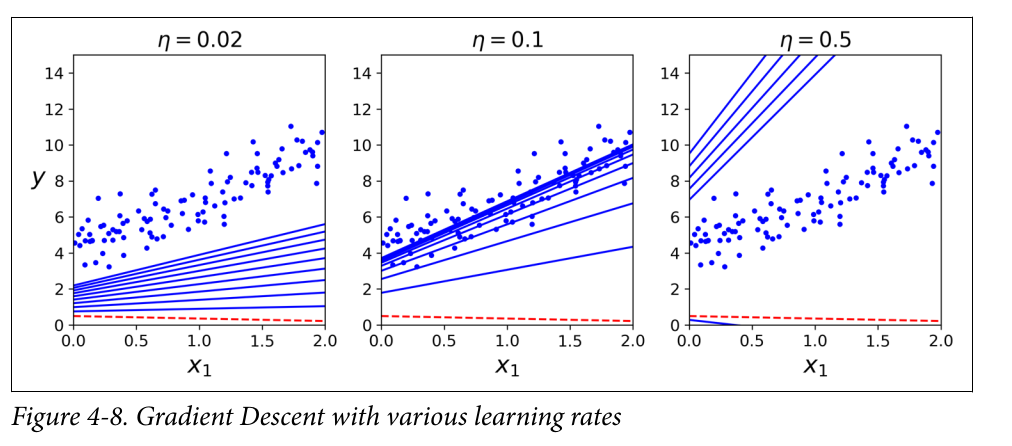

* On the left, the learning rate is too low, and it would take a long time for the model to converge.
* In the middle, the learning rate is just right.
* on the right, the learning rate is too large, which makes the model diverge. 

## Stochastic Gradient Descent
Instead of using the entire training data to calculate the gradient, we can choose a single training sample at random and use that to calculate a single step.

Benefits and drawbacks of this approach:

Benefits:
1. It is faster to calculate a single step since we need to use only a single sample from the data.
2. It helps to escape from local minima. 

drawback:
Because of the random nature of this algorithm, it is not possible to reach the global minimum since the algorithm will start bouncing around it when it reaches it. 

A solution to the drawback of this algorithm would be to gradually reduce the learning rate as the training progresses. This can be done using a _learning schedule_. 

__Note:__ The following code isn't guaranteed to pick all the samples since we are choosing at random. You can instead shuffle the entire dataset and labels jointly, and pick them one by one. Make sure to reshuffle at the start of each epoch.

In [32]:
n_epochs = 50
t0, t1 = 5, 50 #learning schedule hyperparameters

def learning_schedule(t):
    return t0/(t + t1)

theta = np.random.randn(2, 1) #random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2*xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch*m + i)
        theta = theta - eta * gradients


In [37]:
theta

array([[3.73967031],
       [3.27428573]])

To perform SGD linear regression in scikit-learn, we can use the SGDRegressor class as follows:

In [38]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = None, eta0 = 0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [39]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.74606432]), array([3.30913976]))

## Minibatch Gradient Descent